In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [2]:
df_vg =  pd.read_csv('Catalogues/NGC1027_vG2023+GaiaDR3.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,NGC_1027,465695474182156288,40.406755,61.776293,0.7598,-2.144,2.240,20.454760,21.504877,19.255125,...,NaN,NaN,NaN,NaN,40.406775,61.776283,10.129286,10.781652,-0.1126,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0
1377,NGC_1027,465695126289128576,40.340698,61.742587,0.6292,-1.685,2.128,19.259914,20.094313,18.372610,...,NaN,NaN,NaN,NaN,40.340714,61.742578,4.578806,5.166427,-0.2178,0.0
1378,NGC_1027,465695096222913152,40.387508,61.768844,0.3626,-1.220,2.507,20.064852,21.051865,18.944124,...,NaN,NaN,NaN,NaN,40.387520,61.768833,8.462630,8.415401,0.0792,0.0


In [3]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [4]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,NGC_1027,465699421256538368,40.269906,61.848165,0.9031,-1.868,1.933,17.708502,18.587675,16.822248,...,0.4368,0.3484,0.4884,PHOENIX,40.269923,61.848156,1.550565,1.533550,-0.1668,0.0
1373,NGC_1027,465699215097697664,40.361267,61.884989,0.8797,-1.744,2.062,16.665634,17.330374,15.860227,...,0.5042,0.4890,0.5181,MARCS,40.361283,61.884980,0.833605,0.912919,-0.1607,0.0
1374,NGC_1027,465695474190193408,40.427435,61.781116,0.7913,-1.737,2.134,16.822556,17.511656,16.019714,...,0.6440,0.6199,0.6546,PHOENIX,40.427452,61.781107,0.928986,0.960028,-0.1326,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0


# 5 Populations

In [5]:
p1 = pd.read_csv('Catalogues/pop1_NGC1027_GMM3.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC1027_GMM3.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC1027_GMM3.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC1027_GMM3.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC1027_GMM3.csv')

## Computing Completeness and Purity

### Population 1

In [6]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [7]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [8]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [9]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [10]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [11]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
181,40.569794,61.593147,-2.185,2.694,15.897775,1.327317,0.9002,0


In [12]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
198,NGC_1027,465679359473038208,40.569773,61.593159,0.9002,-2.185,2.694,15.897775,16.469511,15.142194,...,0.5369,0.5305,0.5434,MARCS,40.569794,61.593147,0.541457,0.577475,-0.1224,0.0


Text(0, 0.5, 'DEC (deg)')

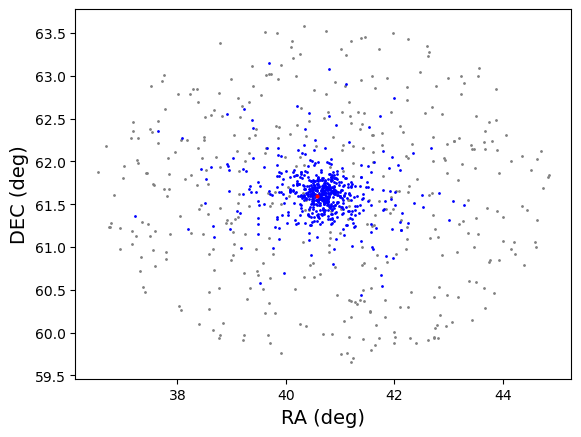

In [13]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [14]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [15]:
p1_c = p1_t /dfvg_t
p1_c*100

0.16750418760469013

Pureness

In [16]:
p1_p = p1_t/len(p1)
p1_p*100

0.24096385542168677

### Population 2

In [17]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [18]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [19]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [20]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [21]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [22]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,41.662526,62.433631,-0.350,1.244,20.128624,2.088963,0.9901,1
1,41.298970,62.354745,-0.092,2.550,19.676165,2.304686,1.0178,1
2,41.031995,62.444638,-1.799,2.004,20.192627,2.063591,0.9019,1
3,41.037897,62.471451,-0.748,1.424,19.522741,1.964128,0.9584,1
4,41.348798,62.410256,-2.263,0.474,19.819939,2.073547,0.9128,1
...,...,...,...,...,...,...,...,...
685,40.110698,63.534989,-1.597,1.585,20.335096,1.680340,0.9504,1
686,39.879885,63.562046,-1.317,2.845,18.463370,1.947622,0.9108,1
687,39.926841,63.580954,-0.710,1.835,20.067148,1.665369,0.9778,1
688,40.138510,63.544575,-3.219,0.864,19.755924,1.891998,1.0549,1


In [23]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
20,38.918851,62.556110,-1.787,1.910,17.430868,1.722366,0.8259,1
30,40.210376,62.642302,-2.047,2.144,16.760485,1.675523,0.8509,1
166,39.696727,63.156079,-1.952,1.950,15.738831,1.278232,0.9259,1
252,41.991470,62.738418,-1.732,2.268,16.083628,1.326920,0.9009,1
325,41.114905,62.905420,-1.936,2.048,8.369972,1.432346,0.9308,1
346,40.787309,63.076058,-1.898,2.113,16.967535,1.562469,0.8373,1


In [24]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
1236,NGC_1027,465979934159829632,38.918833,62.556119,0.8259,-1.787,1.910,17.430868,18.262980,16.540613,...,0.5016,0.4827,0.5162,PHOENIX,38.918851,62.556110,1.275041,1.658349,-0.2208,0.0
9,NGC_1027,466015878748329472,40.210357,62.642312,0.8509,-2.047,2.144,16.760485,17.562668,15.887145,...,0.6872,0.6761,0.6997,PHOENIX,40.210376,62.642302,0.849897,0.889063,-0.0728,0.0
451,NGC_1027,466112807573205248,39.696708,63.156088,0.9259,-1.952,1.950,15.738831,16.299076,15.020844,...,0.4310,0.4143,0.4582,MARCS,39.696727,63.156079,0.277557,0.471373,-0.5377,0.0
465,NGC_1027,467345360106608000,41.991454,62.738428,0.9009,-1.732,2.268,16.083628,16.674650,15.347731,...,0.4250,0.4146,0.4355,MARCS,41.991470,62.738418,0.643855,0.764214,-0.1848,0.0
452,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,...,NaN,NaN,NaN,NaN,41.114905,62.905420,0.294193,0.310339,-0.1056,0.0
83,NGC_1027,467553236523330816,40.787290,63.076067,0.8373,-1.898,2.113,16.967535,17.682224,16.119755,...,0.4930,0.4739,0.5081,PHOENIX,40.787309,63.076058,1.053457,1.116594,-0.3722,0.0


Text(0, 0.5, 'DEC (deg)')

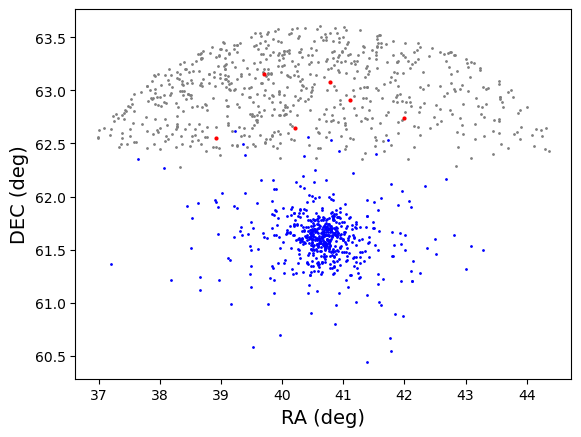

In [25]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [26]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [27]:
p2_c = p2_t /dfvg_t
p2_c*100

1.0050251256281406

Pureness

In [28]:
p2_p = p2_t/len(p2)
p2_p*100

0.8695652173913043

### Population 3

In [29]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [30]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [31]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [32]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [33]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [34]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,42.998844,61.313695,-1.570,2.043,16.328817,1.396971,0.8683,2
1,43.278897,61.494618,-1.534,2.108,15.445359,1.258800,0.8847,2
2,41.951460,61.204688,-1.660,1.738,16.049967,1.337310,0.9042,2
3,41.570289,61.173400,-1.596,2.023,16.192581,1.385247,0.8300,2
4,41.654516,61.223737,-1.741,1.936,16.519371,1.419205,0.9554,2
...,...,...,...,...,...,...,...,...
387,38.925701,61.948183,-1.848,1.812,16.637203,1.540484,0.8856,2
388,38.908028,61.971698,-1.825,1.847,15.655247,1.433902,0.8615,2
389,38.626786,61.938464,-1.904,2.152,15.519888,1.342092,0.8781,2
390,40.516579,62.135362,-2.007,2.251,14.682241,1.091317,0.8318,2


In [35]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
587,NGC_1027,464916985594901504,42.998829,61.313704,0.8683,-1.570,2.043,16.328817,16.959078,15.562107,...,0.3618,0.3491,0.3712,PHOENIX,42.998844,61.313695,0.661760,0.633674,-0.1152,0.0
415,NGC_1027,464925781687795712,43.278883,61.494627,0.8847,-1.534,2.108,15.445359,15.993872,14.735071,...,0.5841,0.5643,0.5938,MARCS,43.278897,61.494618,0.484497,0.403216,-0.1645,0.0
407,NGC_1027,464947806280926464,41.951445,61.204695,0.9042,-1.660,1.738,16.049967,16.642725,15.305415,...,0.2506,0.2272,0.2669,MARCS,41.951460,61.204688,0.554954,0.605513,-0.0247,0.0
385,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,...,0.4325,0.4067,0.4524,MARCS,41.570289,61.173400,0.565584,0.578736,-0.0684,0.0
383,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,...,0.4332,0.4085,0.4866,PHOENIX,41.654516,61.223737,0.689309,0.694405,0.0169,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,NGC_1027,465924103888287232,38.925684,61.948191,0.8856,-1.848,1.812,16.637203,17.355324,15.814839,...,0.6284,0.6148,0.6461,MARCS,38.925701,61.948183,0.704856,0.743628,-0.0640,0.0
979,NGC_1027,465924172607759104,38.908010,61.971706,0.8615,-1.825,1.847,15.655247,16.300783,14.866881,...,0.6605,0.6567,0.6645,MARCS,38.908028,61.971698,0.467464,0.500334,-0.0968,0.0
975,NGC_1027,465925924954246656,38.626768,61.938473,0.8781,-1.904,2.152,15.519888,16.112760,14.770668,...,0.6285,0.6248,0.6324,MARCS,38.626786,61.938464,0.407226,0.439171,0.0143,0.0
941,NGC_1027,465984748825655424,40.516560,62.135372,0.8318,-2.007,2.251,14.682241,15.133806,14.042489,...,0.5591,0.5466,0.5647,MARCS,40.516579,62.135362,0.348359,0.410048,-0.2248,0.0


Text(0, 0.5, 'DEC (deg)')

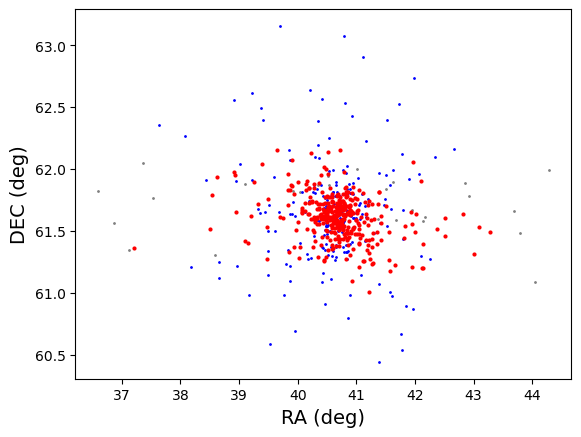

In [36]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [37]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [38]:
p3_c = p3_t /dfvg_t
p3_c*100

62.47906197654941

Pureness

In [39]:
p3_p = p3_t/len(p3)
p3_p*100

92.7860696517413

### Population 4

In [40]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [41]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [42]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [43]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [44]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [45]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
199,41.773842,60.540364,-1.799,2.160,17.921892,1.896875,0.8545,3
215,41.391990,60.440964,-1.793,1.868,15.092919,1.412945,0.8665,3
243,41.760699,60.667437,-1.459,2.020,15.022243,1.328855,0.9060,3
268,41.611992,60.973924,-1.594,1.968,15.476273,1.462549,0.9201,3
269,41.581235,61.004054,-1.653,2.079,14.985799,1.405977,0.8678,3
...,...,...,...,...,...,...,...,...
1655,40.799703,62.531996,-1.725,1.986,17.081020,1.657507,0.9817,3
1675,39.368148,62.490340,-2.004,2.034,15.149142,1.330150,0.9044,3
1683,39.226677,62.617298,-1.993,1.979,16.447214,1.525211,0.9070,3
1898,42.672845,62.162149,-1.700,2.186,16.238014,1.464796,0.9654,3


In [46]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
779,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,...,0.4450,0.4032,0.5247,PHOENIX,41.773842,60.540364,1.608477,1.663375,-0.1617,0.0
859,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,...,1.0850,1.0804,1.0892,MARCS,41.391990,60.440964,0.358247,0.381025,-0.1236,0.0
687,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,...,0.9842,0.9744,0.9895,MARCS,41.760699,60.667437,0.355979,0.334857,-0.1361,0.0
643,NGC_1027,464850499494348160,41.611977,60.973933,0.9201,-1.594,1.968,15.476273,16.141022,14.678472,...,0.7778,0.7738,0.7821,MARCS,41.611992,60.973924,0.467484,0.443929,0.0319,0.0
644,NGC_1027,464850770077768704,41.581220,61.004063,0.8678,-1.653,2.079,14.985799,15.615413,14.209435,...,1.1189,1.1144,1.1237,A,41.581235,61.004054,0.355784,0.354408,-0.0011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,NGC_1027,466023644050466560,40.799686,62.532005,0.9817,-1.725,1.986,17.081020,17.874979,16.217472,...,0.5583,0.5422,0.5725,PHOENIX,40.799703,62.531996,0.999452,1.078600,-0.0472,0.0
92,NGC_1027,466057728911784448,39.368128,62.490349,0.9044,-2.004,2.034,15.149142,15.735953,14.405804,...,0.6571,0.6522,0.6696,MARCS,39.368148,62.490340,0.392295,0.448106,-0.2797,0.0
100,NGC_1027,466071434144149120,39.226658,62.617307,0.9070,-1.993,1.979,16.447214,17.155657,15.630446,...,0.6319,0.6197,0.6423,MARCS,39.226677,62.617298,0.761983,0.819195,-0.2950,0.0
786,NGC_1027,467252240914244480,42.672829,62.162159,0.9654,-1.700,2.186,16.238014,16.906803,15.442007,...,0.5690,0.5599,0.5761,PHOENIX,42.672845,62.162149,0.632334,0.661989,-0.0443,0.0


Text(0, 0.5, 'DEC (deg)')

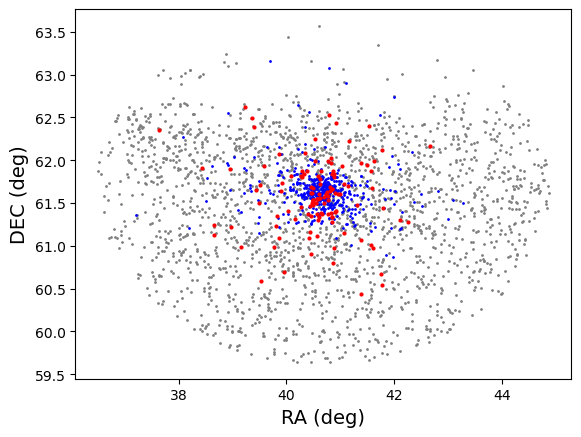

In [48]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [49]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [50]:
p4_c = p4_t /dfvg_t
p4_c*100

20.435510887772192

Pureness

In [51]:
p4_p = p4_t/len(p4)
p4_p*100

5.66651184393869

### Population 5

In [52]:
ra1 = p5.RAJ2000
dec1 = p5.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [53]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [54]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [55]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [56]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [57]:
p5.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
22,41.971382,60.869417,-1.530,2.133,13.546622,0.857985,0.8965,4
25,41.851700,60.892318,-1.809,1.878,12.826741,0.889601,0.9197,4
91,40.634930,61.266340,-1.510,1.635,13.094525,0.773416,0.8636,4
95,41.153191,61.416636,-1.383,1.559,15.185560,1.172880,0.8225,4
110,40.478962,61.542470,-1.513,1.877,18.836012,2.526375,0.9336,4
111,40.606277,61.562247,-1.752,1.433,13.189875,0.712843,0.8748,4
113,40.500676,61.625759,-1.286,2.061,13.064967,0.676472,0.8759,4
117,40.676515,61.660905,-1.611,2.561,14.348477,1.024797,0.9066,4
118,40.662179,61.666321,-1.197,1.823,12.989150,0.654678,0.8889,4
119,40.527108,61.684224,-2.316,1.874,11.910837,0.492836,0.8644,4


In [58]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
669,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,...,0.8384,0.8376,0.8392,A,41.971382,60.869417,0.208742,0.191189,-0.1311,0.0
673,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,...,NaN,NaN,NaN,NaN,41.851700,60.892318,0.215535,0.196625,-0.0597,0.0
1109,NGC_1027,465619470447676672,40.634916,61.266347,0.8636,-1.510,1.635,13.094525,13.394835,12.621419,...,NaN,NaN,NaN,NaN,40.634930,61.266340,0.178342,0.186428,-0.0976,0.0
1177,NGC_1027,465624452609750400,41.153178,61.416643,0.8225,-1.383,1.559,15.185560,15.687974,14.515094,...,0.5943,0.5828,0.6021,PHOENIX,41.153191,61.416636,0.372515,0.407510,-0.0605,0.0
253,NGC_1027,465678805412586880,40.478948,61.542479,0.9336,-1.513,1.877,18.836012,20.225409,17.699034,...,0.6443,0.6237,0.6637,MARCS,40.478962,61.542470,3.064943,3.249671,-0.1855,0.0
245,NGC_1027,465679084595156352,40.606261,61.562254,0.8748,-1.752,1.433,13.189875,13.463261,12.750418,...,0.7100,0.7092,0.7109,A,40.606277,61.562247,0.226640,0.247819,-0.0539,0.0
164,NGC_1027,465680248522159104,40.500664,61.625768,0.8759,-1.286,2.061,13.064967,13.324005,12.647533,...,NaN,NaN,NaN,NaN,40.500676,61.625759,0.235049,0.243473,0.0026,0.0
336,NGC_1027,465681317978049536,40.676500,61.660917,0.9066,-1.611,2.561,14.348477,14.772078,13.747280,...,0.5973,0.5937,0.6010,A,40.676515,61.660905,0.284855,0.290040,-0.1264,0.0
334,NGC_1027,465681421057261696,40.662168,61.666329,0.8889,-1.197,1.823,12.989150,13.239675,12.584996,...,0.6514,0.6491,0.6538,A,40.662179,61.666321,0.213249,0.215710,-0.0939,0.0
375,NGC_1027,465682103948024320,40.527086,61.684232,0.8644,-2.316,1.874,11.910837,12.088751,11.595915,...,NaN,NaN,NaN,NaN,40.527108,61.684224,0.283212,0.290901,-0.0109,0.0


Text(0, 0.5, 'DEC (deg)')

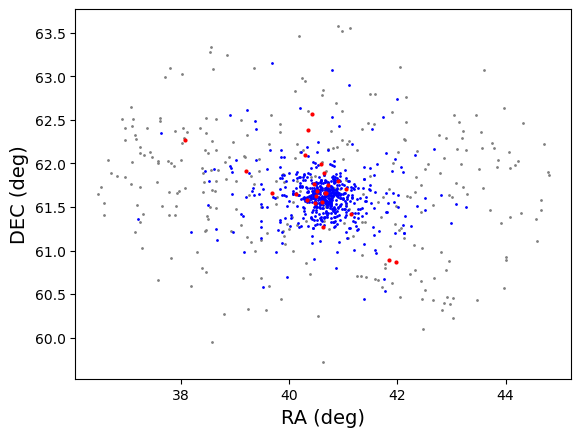

In [60]:
fig, ax = plt.subplots()

ax.scatter(p5.RAJ2000, p5.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p5.iloc[matched_idx_catalog1].RAJ2000, p5.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [61]:
dfvg_t = len(dfvg)
p5_t = len(p5.iloc[matched_idx_catalog1])

Completeness


In [62]:
p5_c = p5_t /dfvg_t
p5_c*100

4.0201005025125625

Pureness

In [63]:
p5_p = p5_t/len(p5)
p5_p*100

7.164179104477612

## Analyzing

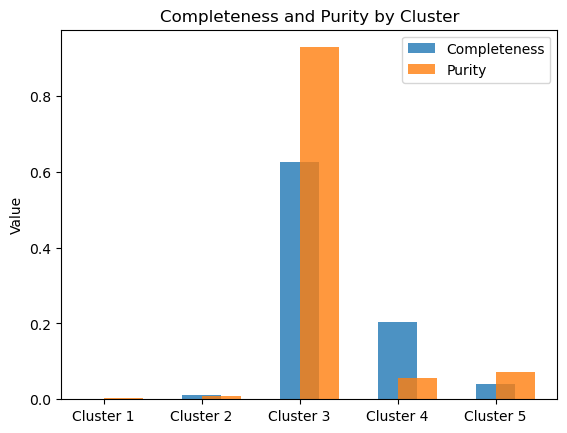

In [64]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_c, p2_c, p3_c, p4_c, p5_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p, p5_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()